In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
import sys
sys.path.append("..")

import FlightPhaseTools as fpt
from ResearchFlight import ResearchFlight
from ResearchFlightSegment import ResearchFlightSegment

# Load data into xarray datasets using typhon FileSet objects.

In [2]:
bahamas = xr.open_dataset('../../data/bahamas_20200131_v0.4.nc')
dropsondes = xr.open_dataset('../../data/dropsondes_20200131_v0.4.nc')

# Determine the timestamps of the different flight phases using the FlightPhaseTools module.

In [45]:
takeoff = 0
touchdown = len(bahamas['time']) - 1

#1st circle set
###############
#enter_c1 = fpt.ds_timestamp_ind(bahamas, dropsondes,  1)
#exit_c1  = fpt.ds_timestamp_ind(bahamas, dropsondes, 11)
#enter_c1_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 0)
#enter_c1 = fpt.timestamp_ind_1min_prior(bahamas, enter_c1_ds)
enter_c1 = 1200 # manual set
exit_c1 = fpt.exit_circle_timestamp_ind(bahamas, enter_c1)

#enter_c2 = fpt.ds_timestamp_ind(bahamas, dropsondes, 12)
#exit_c2  = fpt.ds_timestamp_ind(bahamas, dropsondes, 23)
enter_c2_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 12)
enter_c2 = fpt.timestamp_ind_1min_prior(bahamas, enter_c2_ds)
exit_c2 = fpt.exit_circle_timestamp_ind(bahamas, enter_c2)


#enter_c3 = fpt.ds_timestamp_ind(bahamas, dropsondes, 24)
#exit_c3  = fpt.ds_timestamp_ind(bahamas, dropsondes, 35)
#enter_c3_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 24)
#enter_c3 = fpt.timestamp_ind_1min_prior(bahamas, enter_c3_ds)
enter_c3 = 9700 # manual set
exit_c3 = fpt.exit_circle_timestamp_ind(bahamas, enter_c3)



#Excursion
##########
#leg1 (towards NTAS)
max_roll_before_leg1 = fpt.max_timestamp_ind(bahamas, 'roll', 
                       slice('2020-01-31T18:40:00', '2020-01-31T19:00:00'), order=1000)

enter_leg1 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', max_roll_before_leg1, 0., 0.05)

min_roll_after_leg1 = fpt.min_timestamp_ind(bahamas, 'roll', 
                      slice('2020-01-31T19:00:00', '2020-01-31T19:20:00'), order=1000)

exit_leg1 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', min_roll_after_leg1, 0., 0.05)

#rad_circle (around Ron Brown)
enter_rad_circle = fpt.find_first_value_after_ts_ind(bahamas, 'roll', min_roll_after_leg1, 10., 0.05)

min_roll_after_rad_circle = fpt.min_timestamp_ind(bahamas, 'roll', 
                            slice('2020-01-31T19:30:00', '2020-01-31T19:40:00'), order=1000)

exit_rad_circle = fpt.find_first_value_before_ts_ind(bahamas, 'roll', min_roll_after_rad_circle, 10., 0.05)

#leg2 (back towards circle, with radar_cal_wiggle in it)
min_roll_before_leg2 = fpt.min_timestamp_ind(bahamas, 'roll', 
                       slice('2020-01-31T19:30:00', '2020-01-31T19:40:00'), order=1000)

enter_leg2 = fpt.find_first_value_after_ts_ind(bahamas, 'roll', min_roll_before_leg2, 0., 0.05)

min_roll_after_leg2 = fpt.min_timestamp_ind(bahamas, 'roll', 
                      slice('2020-01-31T19:50:00', '2020-01-31T20:00:00'), order=1000)

exit_leg2 = fpt.find_first_value_before_ts_ind(bahamas, 'roll', min_roll_after_leg2, 0., 0.05)


#radar_cal_wiggle
min_roll_wiggle = fpt.min_timestamp_ind(bahamas, 'roll', 
                  slice('2020-01-31T19:40:00', '2020-01-31T19:50:00'), order=1000)

enter_wiggle = fpt.find_first_value_before_ts_ind(bahamas, 'roll', min_roll_wiggle, 0., 0.05)

max_roll_wiggle = fpt.max_timestamp_ind(bahamas, 'roll', 
                  slice('2020-01-31T19:40:00', '2020-01-31T19:50:00'), order=1000)

exit_wiggle = fpt.find_first_value_after_ts_ind(bahamas, 'roll', min_roll_wiggle, 0., 0.05)

#2nd circle set
###############
#enter_c4 = fpt.ds_timestamp_ind(bahamas, dropsondes, 38)
#exit_c4  = fpt.ds_timestamp_ind(bahamas, dropsondes, 49)
enter_c4_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 38)
enter_c4 = fpt.timestamp_ind_1min_prior(bahamas, enter_c4_ds)
exit_c4 = fpt.exit_circle_timestamp_ind(bahamas, enter_c4)

#enter_c5 = fpt.ds_timestamp_ind(bahamas, dropsondes, 50)
#exit_c5  = fpt.ds_timestamp_ind(bahamas, dropsondes, 61)
enter_c5_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 50)
enter_c5 = fpt.timestamp_ind_1min_prior(bahamas, enter_c5_ds)
exit_c5 = fpt.exit_circle_timestamp_ind(bahamas, enter_c5)


#enter_c6 = fpt.ds_timestamp_ind(bahamas, dropsondes, 62)
#exit_c6  = fpt.ds_timestamp_ind(bahamas, dropsondes, 73)
enter_c6_ds = fpt.ds_timestamp_ind(bahamas, dropsondes, 62)
enter_c6 = fpt.timestamp_ind_1min_prior(bahamas, enter_c6_ds)
enter_c6 = 26370 #manual set
exit_c6 = fpt.exit_circle_timestamp_ind(bahamas, enter_c6)


#lidar_cal
bahamas["altitude_dt"] = (['time'], np.append(np.diff(bahamas["altitude"]),0))

min_dzdt_before_lidar_cal = fpt.min_timestamp_ind(bahamas, 'altitude_dt', 
                            slice('2020-01-31T23:20:00', '2020-01-31T23:40:00'), order=1000)

enter_lidar_cal = fpt.find_first_value_after_ts_ind(bahamas, 'altitude_dt', min_dzdt_before_lidar_cal, 0., 0.05)

min_dzdt_after_lidar_cal = fpt.min_timestamp_ind(bahamas, 'altitude_dt', 
                           slice('2020-01-31T23:40:00', '2020-01-31T23:50:00'), order=1000)

exit_lidar_cal = fpt.find_first_value_before_ts_ind(bahamas, 'altitude_dt', min_dzdt_after_lidar_cal, 0., 0.05)


ts_ind_list = [takeoff, enter_c1, exit_c1, enter_c2, 
               exit_c2, enter_c3, exit_c3, enter_leg1, exit_leg1,
               enter_rad_circle, exit_rad_circle, enter_leg2, 
               enter_wiggle, exit_wiggle, exit_leg2, enter_c4, 
               exit_c4, enter_c5, exit_c5, enter_c6, exit_c6,
               enter_lidar_cal, exit_lidar_cal, touchdown,]
label_list = ["takeoff", "enter_c1", "exit_c1", 
              "enter_c2", "exit_c2", "enter_c3", "exit_c3", 
              "enter_leg1", "exit_leg1","enter_rad_circle",
              "exit_rad_circle", "enter_leg2", "enter_wiggle", 
              "exit_wiggle", "exit_leg2", "enter_c4", "exit_c4", 
              "enter_c5", "exit_c5", "enter_c6", "exit_c6",
              "enter_lidar_cal","exit_lidar_cal", "touchdown"]

In [42]:
#create markers for every dropsonde
#only for checking segments

takeoff = 0
touchdown = len(bahamas['time']) - 1

ts_ind_list = []
label_list = np.arange(len(dropsondes["launch_time"])+1)
for i in range(len(dropsondes["launch_time"])):
    ts_ind_list.append(fpt.ds_timestamp_ind(bahamas, dropsondes,  i))

# Create basic timeseries of bahamas data with markers for determined timestamps to manually evaluate the validity of the timestamps.

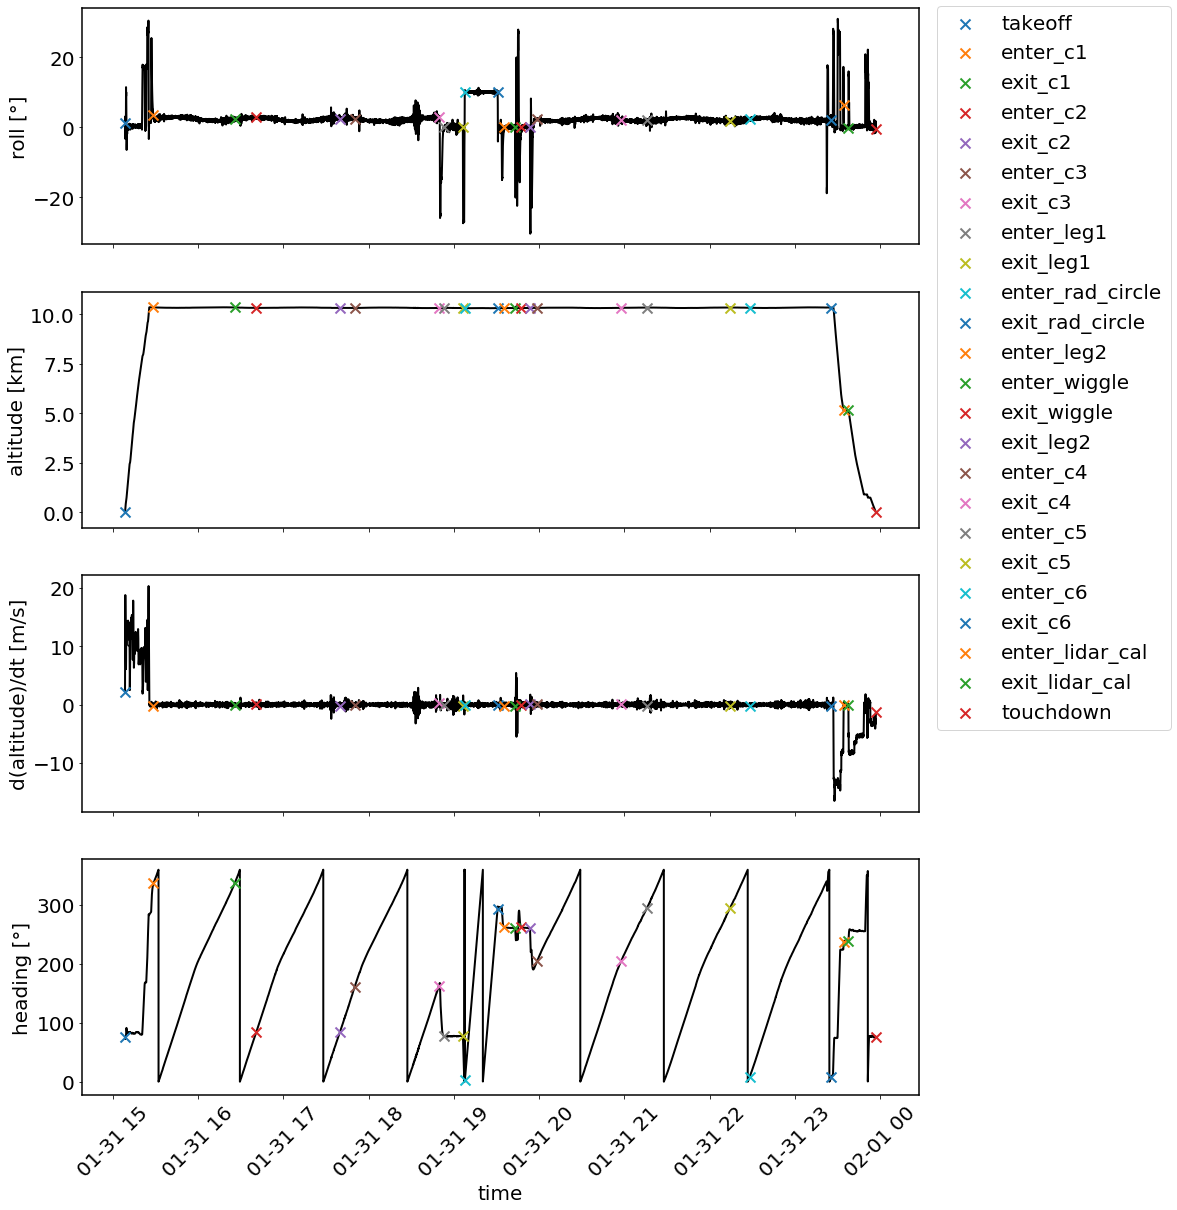

In [53]:
fig, ax = fpt.plot_bahamas_timeseries(bahamas, ts_ind_list, label_list)
#ax[0].set_xlim([datetime(2020, 1, 31, 22, 15, 0), datetime(2020, 1, 31, 23, 45, 0)])

#### Playground to play with indices

In [47]:
print(enter_c6, fpt.ds_timestamp_ind(bahamas, dropsondes, 73))
print(exit_c6, fpt.exit_circle_timestamp_ind(bahamas, enter_c6))

26370 29818
<xarray.DataArray 'heading' ()>
array(29823) <xarray.DataArray 'heading' ()>
array(29823)


# Create a ResearchFlight object to represent the flight meta data.

In [48]:
RF07 = ResearchFlight(name=f"RF{bahamas.attrs['flight_number']}",
                      mission=bahamas.attrs['mission'],
                      flight_id='HALO-0131',
                      contacts=[
                          {
                              'name': 'Marc Prange', 
                              'email': 'marc.prange@uni-hamburg.de',
                              'tags': ['dataset creator'],
                          },
                          {
                              'name': 'Geet George',
                              'email': 'geet.george@mpimet.mpg.de',
                              'tags': ['flight PI']
                          }
                      ],
                      date=fpt.dt64_to_dt(bahamas['time'][takeoff].values).date(),
                      flight_report='https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200131/HALO_0131.pdf',
                      takeoff=fpt.dt64_to_dt(bahamas['time'][takeoff].values),
                      landing=fpt.dt64_to_dt(bahamas['time'][touchdown].values),
                      events=[],
                      remarks=['Persistent shallow dust layer, more intense towards the south, accompanied there by shallow cumuli.',
                               '1st set of circles: Fading flower.', 
                               '2nd set of circles: Malnourished spine of a fish.',
                               'Excursion: Partly successful with the 10deg bank (or 540deg heading) manoeuvre.',
                               'The Flo-manoeuvre (wiggle) failed as the radar stopped right before it.'],
                     )

# Store the flight phase information in ResearchFlightSegment objects.

In [49]:
circle1 = ResearchFlightSegment(kinds=['circle'],
                                name='circle 1',
                                segment_id='Flight-ID_c1',
                                good_dropsondes=11,
                                irregularities = '',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c1].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c1].values)
                               )
circleBreak1to2 = ResearchFlightSegment(kinds=['circle_break'],
                                        name='circle break between circle 1 and 2',
                                        segment_id='Flight-ID_cb1',
                                        irregularities = '',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c1].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c2].values)
                                       )
circle2 = ResearchFlightSegment(kinds=['circle'],
                                name='circle 2',
                                segment_id='Flight-ID_c2',
                                good_dropsondes=11,
                                irregularities = '',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c2].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c2].values)
                               )
circleBreak2to3 = ResearchFlightSegment(kinds=['circle_break'],
                                        name='circle break between circle 2 and 3',
                                        segment_id='Flight-ID_cb2',
                                        irregularities = '',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c2].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c3].values)
                                       ) 
circle3 = ResearchFlightSegment(kinds=['circle'],
                                name='circle 3',
                                segment_id='Flight-ID_c3',
                                good_dropsondes=12,
                                irregularities = '',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c3].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c3].values)
                               )
leg1 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='leg 1 outbound towards NTAS buoy',
                             segment_id='Flight-ID_sl1',
                             irregularities = '',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg1].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg1].values)
                            )
radar_cal_tilted = ResearchFlightSegment(kinds=['radar_calibration_tilted'], 
                                         name='radar calibration circle',
                                         segment_id='Flight-ID_rct1',
                                         irregularities = '',
                                         start=fpt.dt64_to_dt(bahamas["time"][enter_rad_circle].values),
                                         end=fpt.dt64_to_dt(bahamas['time'][exit_rad_circle].values)
                                         )
leg2 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='leg 2 inbound from NTAS buoy back to circle area',
                             segment_id='Flight-ID_sl2',
                             irregularities = '',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg2].values),
                             end=fpt.dt64_to_dt(bahamas['time'][enter_wiggle].values)
                            )
radar_cal_wiggle = ResearchFlightSegment(kinds=['radar_calibration_wiggle'], 
                                         name='radar calibration wiggle pattern',
                                         segment_id='Flight-ID_rcw1',
                                         irregularities = '',
                                         start=fpt.dt64_to_dt(bahamas["time"][enter_wiggle].values),
                                         end=fpt.dt64_to_dt(bahamas['time'][exit_wiggle].values))
leg3 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='leg 3 inbound from NTAS buoy back to circle area',
                             segment_id='Flight-ID_sl3',
                             irregularities = '',
                             start=fpt.dt64_to_dt(bahamas["time"][exit_wiggle].values),
                             end=fpt.dt64_to_dt(bahamas['time'][exit_leg2].values)
                            )
circle4 = ResearchFlightSegment(kinds=['circle'],
                                name='circle 4',
                                segment_id='Flight_ID_c4',
                                good_dropsondes=12,
                                irregularities = '',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c4].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c4].values)
                               )
circleBreak4to5 = ResearchFlightSegment(kinds=['circle_break'],
                                        name='circle break between circle 4 and 5',
                                        segment_id='Flight-ID_cb3',
                                        irregularities = '',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c4].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c5].values)
                                       )
circle5 = ResearchFlightSegment(kinds=['circle'],
                                name='circle 5',
                                segment_id='Flight_ID_c5',
                                good_dropsondes=12,
                                irregularities = '',
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c5].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c5].values)
                               )
circleBreak5to6 = ResearchFlightSegment(kinds=['circle_break'],
                                        name='circle break between circle 5 and 6',
                                        segment_id='Flight-ID_cb4',
                                        irregularities = '',
                                        start=fpt.dt64_to_dt(bahamas["time"][exit_c5].values),
                                        end=fpt.dt64_to_dt(bahamas['time'][enter_c6].values)
                                       )                                    
circle6 = ResearchFlightSegment(kinds=['circle'],
                                name='circle 6',
                                segment_id='Flight_ID_c6',
                                good_dropsondes=12,
                                irregularities = (f'last sonde slightly delayed to'
                                                  f'circumvent conflict with P3.'),
                                start=fpt.dt64_to_dt(bahamas["time"][enter_c6].values),
                                end=fpt.dt64_to_dt(bahamas['time'][exit_c6].values)
                               )
lidar_cal = ResearchFlightSegment(kinds='lidar_calibration',
                                  name='lidar calibration',
                                  segment_id='Flight-ID_lc1',
                                  irregularities = '',
                                  start=fpt.dt64_to_dt(bahamas["time"][enter_lidar_cal].values),
                                  end=fpt.dt64_to_dt(bahamas['time'][exit_lidar_cal].values)
                                 )

# Append the flight segments to the ResearchFlight object and save the object content to a .yaml file.

In [50]:
RF07.to_dictionary()

{'name': 'RF07',
 'mission': 'EUREC4A',
 'flight_id': 'HALO-0131',
 'contacts': [{'name': 'Marc Prange',
   'email': 'marc.prange@uni-hamburg.de',
   'tags': ['dataset creator']},
  {'name': 'Geet George',
   'email': 'geet.george@mpimet.mpg.de',
   'tags': ['flight PI']}],
 'date': datetime.date(2020, 1, 31),
 'flight_report': 'https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200131/HALO_0131.pdf',
 'takeoff': datetime.datetime(2020, 1, 31, 15, 8, 35),
 'landing': datetime.datetime(2020, 1, 31, 23, 56, 53),
 'events': [],
 'remarks': ['Persistent shallow dust layer, more intense towards the south, accompanied there by shallow cumuli.',
  '1st set of circles: Fading flower.',
  '2nd set of circles: Malnourished spine of a fish.',
  'Excursion: Partly successful with the 10deg bank (or 540deg heading) manoeuvre.',
  'The Flo-manoeuvre (wiggle) failed as the radar stopped right before it.'],
 'segments': []}

In [51]:
RF07.append_segments([circle1, circleBreak1to2, 
                      circle2, circleBreak2to3,
                      circle3, leg1, radar_cal_tilted,
                      leg2, radar_cal_wiggle, leg3, 
                      circle4, circleBreak4to5,
                      circle5, circleBreak5to6, 
                      circle6, lidar_cal])

In [52]:
RF07.to_yaml(filename='../flight_phase_files/HALO_RF07_20200131_info.yaml')

### Comment: circle 5 and 6 start times were modified in a further post-processing step from checking the html files generated with `report.py` with the aim to close small gaps (<1.5min flight time) in the 360° circle.